<a href="https://colab.research.google.com/github/mrdhridho/Magnimind-Academy/blob/master/concate_1_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_excel("/content/drive/My Drive/junktoclear_data_training.xls")
train = df_train[df_train.quoted_amount > 0]
df_train.shape

(9887, 24)

In [5]:
test = pd.read_excel("/content/drive/My Drive/junktoclear_data_testing.xls")
test.shape

(1055, 24)

In [6]:
test.shape

(1055, 24)

In [7]:
test.head()

,Unnamed: 0,enquiry_id,enquiry_date,enquiry_mode,enquiry_type,preferred_date,preferred_time,preferred_datetime,preferred_date_range,preferred_time_range,removal_item_from,has_lift,lift_level,unit_level,is_mounted,is_bed_bugs,enquiry_status,enquiry_details,quoted_amount,remark,is_viewed,customer_postal_code,delete_status,deleted_on
0,6,27763,2018-08-02,online,residential,2018-08-03,14:00:00,2018-08-03 14:00:00,NaN,NaN,Condo,Yes,NaN,NaN,no,no,job completed,Disposal Item\r\n\r\n1 x Single divan base he...,110.0,2/8 - called 4.55pm customer is no answering p...,1,NaN,0,0000-00-00 00:00:00
1,13,27770,2018-08-03,call in,residential,2018-08-03,09:00:00,2018-08-03 09:00:00,NaN,NaN,Condo,Yes,NaN,NaN,no,no,decline,Disposal Item\r\n\r\nwhole house furniture nee...,1500.0,3/8 - customer will revert,1,228973,0,0000-00-00 00:00:00
2,21,27778,2018-08-03,call in,commercial,2018-08-07,12:00:00,2018-08-07 12:00:00,NaN,NaN,Commercial,Yes,NaN,NaN,no,no,decline,Relocation of 2 x Chairs from Lucky Plaza to N...,80.0,3rd Aug - Emailed quote. Enquiry from Vincent ...,1,608532,0,0000-00-00 00:00:00
3,27,27784,2018-08-03,online,commercial,2018-08-06,14:00:00,2018-08-06 14:00:00,NaN,NaN,Commercial,Yes,NaN,NaN,no,no,job completed,Disposal Item\r\n\r\nabout 15boxes commercial ...,220.0,"4/8 - send by whatapps. Quoted $230, \r\nbest ...",1,409030,0,0000-00-00 00:00:00
4,33,27791,2018-08-04,online,residential,2018-08-10,10:00:00,2018-08-10 10:00:00,NaN,NaN,Condo,Yes,NaN,NaN,no,no,job completed,Disposal Item\r\n\r\n2 x 3 seater sofa,300.0,4/8 - job confirmed for 10/8 - 10am to 11am,1,098329,0,0000-00-00 00:00:00


In [8]:
def handle_missing(dataset):
    dataset.enquiry_type.fillna(value="", inplace=True)
    dataset.removal_item_from.fillna(value="", inplace=True)
    dataset.has_lift.fillna(value="", inplace=True)
    dataset.is_mounted.fillna(value="", inplace=True)
    dataset.is_bed_bugs.fillna(value="", inplace=True)
    
    return (dataset)

#train = handle_missing(train)
#test = handle_missing(test)

# filling missing values of categorical variables with mode

train['enquiry_type'].fillna(train['enquiry_type'].mode()[0], inplace=True)

train['removal_item_from'].fillna(train['removal_item_from'].mode()[0], inplace=True)

train['has_lift'].fillna(train['has_lift'].mode()[0], inplace=True)

train['is_mounted'].fillna(train['is_mounted'].mode()[0], inplace=True)

train['is_bed_bugs'].fillna(train['is_bed_bugs'].mode()[0], inplace=True)

test['enquiry_type'].fillna(test['enquiry_type'].mode()[0], inplace=True)

test['removal_item_from'].fillna(test['removal_item_from'].mode()[0], inplace=True)

test['has_lift'].fillna(test['has_lift'].mode()[0], inplace=True)

test['is_mounted'].fillna(test['is_mounted'].mode()[0], inplace=True)

test['is_bed_bugs'].fillna(test['is_bed_bugs'].mode()[0], inplace=True)

print(train.shape)
print(test.shape)

(9887, 24)
(1055, 24)


In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(np.hstack([train.enquiry_type, test.enquiry_type]))
train.enquiry_type = le.transform(train.enquiry_type)
test.enquiry_type = le.transform(test.enquiry_type)

le.fit(np.hstack([train.removal_item_from, test.removal_item_from]))
train.removal_item_from = le.transform(train.removal_item_from)
test.removal_item_from = le.transform(test.removal_item_from)

le.fit(np.hstack([train.has_lift, test.has_lift]))
train.has_lift = le.transform(train.has_lift)
test.has_lift = le.transform(test.has_lift)

le.fit(np.hstack([train.is_mounted, test.is_mounted]))
train.is_mounted = le.transform(train.is_mounted)
test.is_mounted = le.transform(test.is_mounted)

le.fit(np.hstack([train.is_bed_bugs, test.is_bed_bugs]))
train.is_bed_bugs = le.transform(train.is_bed_bugs)
test.is_bed_bugs = le.transform(test.is_bed_bugs)
del le

train.head(3)

,Unnamed: 0,enquiry_id,enquiry_date,enquiry_mode,enquiry_type,preferred_date,preferred_time,preferred_datetime,preferred_date_range,preferred_time_range,removal_item_from,has_lift,lift_level,unit_level,is_mounted,is_bed_bugs,enquiry_status,enquiry_details,quoted_amount,remark,is_viewed,customer_postal_code,delete_status,deleted_on
0,0,27757,2018-08-02,online,1,2018-08-02,09:00:00,2018-08-02 09:00:00,NaN,NaN,1,1,NaN,NaN,0,0,decline,Disposal Item\r\n\r\n1 x Massage chair\r\n1 x ...,190.0,2/8 - customer will revert,1,NaN,0,0000-00-00 00:00:00
1,1,27758,2018-08-02,call in,1,2018-08-06,14:00:00,2018-08-06 14:00:00,NaN,NaN,3,1,NaN,NaN,0,0,decline,Removal of 1 x 3 Seater leather sofa.\r\n\r\n*...,80.0,2nd Aug - Customer to revert.,1,276636,0,0000-00-00 00:00:00
2,2,27759,2018-08-02,online,1,2018-08-02,09:00:00,2018-08-02 09:00:00,On a Specific Date,Evening till 6:30,1,1,NaN,NaN,0,0,decline,I am unable to take photos of the items due to...,450.0,2/8 - customer will revert,1,425562,0,0000-00-00 00:00:00


In [10]:
print("Text to seq process...")
from keras.preprocessing.text import Tokenizer
raw_text = np.hstack([train.enquiry_details.str.lower()])

print("   Fitting tokenizer...")
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)
print("   Transforming text to seq...")

train["seq_enquiry_details"] = tok_raw.texts_to_sequences(train.enquiry_details.str.lower())
test["seq_enquiry_details"] = tok_raw.texts_to_sequences(test.enquiry_details.str.lower())
train.head(3)

Text to seq process...
   Fitting tokenizer...
   Transforming text to seq...


,Unnamed: 0,enquiry_id,enquiry_date,enquiry_mode,enquiry_type,preferred_date,preferred_time,preferred_datetime,preferred_date_range,preferred_time_range,removal_item_from,has_lift,lift_level,unit_level,is_mounted,is_bed_bugs,enquiry_status,enquiry_details,quoted_amount,remark,is_viewed,customer_postal_code,delete_status,deleted_on,seq_enquiry_details
0,0,27757,2018-08-02,online,1,2018-08-02,09:00:00,2018-08-02 09:00:00,NaN,NaN,1,1,NaN,NaN,0,0,decline,Disposal Item\r\n\r\n1 x Massage chair\r\n1 x ...,190.0,2/8 - customer will revert,1,NaN,0,0000-00-00 00:00:00,"[4, 9, 1, 3, 2, 465, 75, 3, 2, 66]"
1,1,27758,2018-08-02,call in,1,2018-08-06,14:00:00,2018-08-06 14:00:00,NaN,NaN,3,1,NaN,NaN,0,0,decline,Removal of 1 x 3 Seater leather sofa.\r\n\r\n*...,80.0,2nd Aug - Customer to revert.,1,276636,0,0000-00-00 00:00:00,"[6, 5, 3, 2, 18, 23, 312, 35, 1, 1, 11, 322, 1..."
2,2,27759,2018-08-02,online,1,2018-08-02,09:00:00,2018-08-02 09:00:00,On a Specific Date,Evening till 6:30,1,1,NaN,NaN,0,0,decline,I am unable to take photos of the items due to...,450.0,2/8 - customer will revert,1,425562,0,0000-00-00 00:00:00,"[126, 425, 1511, 10, 518, 97, 5, 20, 39, 1245,..."


In [11]:
max_seq_enquiry_details = np.max([np.max(train.seq_enquiry_details.apply(lambda x: len(x)))
                                   , np.max(test.seq_enquiry_details.apply(lambda x: len(x)))])
print("max enquiry_details "+str(max_seq_enquiry_details))

max enquiry_details 549


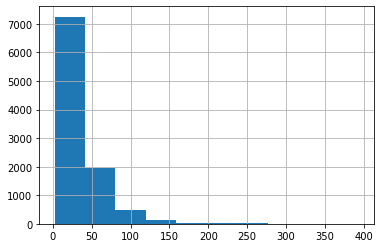

In [12]:
train.seq_enquiry_details.apply(lambda x: len(x)).hist()

In [13]:
MAX_enquiry_details = 500
MAX_TEXT = len(tok_raw.word_index) + 1
MAX_enquiry_type = np.max([train.enquiry_type.max(), test.enquiry_type.max()])+1
MAX_removal_item_from = np.max([train.removal_item_from.max(), test.removal_item_from.max()])+1
MAX_has_lift = np.max([train.has_lift.max(), test.has_lift.max()])+1
MAX_is_mounted = np.max([train.is_mounted.max(), test.is_mounted.max()])+1
MAX_is_bed_bugs = np.max([train.is_bed_bugs.max(), test.is_bed_bugs.max()])+1

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
train["target"] = np.log(train.quoted_amount+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
train["target"] = target_scaler.fit_transform(train.target.values.reshape(-1,1))
#pd.DataFrame(train.target).hist()

In [15]:
from sklearn.model_selection import train_test_split
dtrain, dvalid = train_test_split(train, random_state=123, train_size=0.98)
print(dtrain.shape)
print(dvalid.shape)

(9689, 26)
(198, 26)


In [16]:
from keras.preprocessing.sequence import pad_sequences
def get_keras_data(dataset):
    X = {
        'enquiry_details': pad_sequences(dataset.seq_enquiry_details, maxlen=MAX_enquiry_details)
        ,'enquiry_type': np.array(dataset.enquiry_type)
        ,'removal_item_from': np.array(dataset.removal_item_from)
        ,'has_lift': np.array(dataset.has_lift)
        ,'is_mounted': np.array(dataset.is_mounted)
        ,'is_bed_bugs': np.array(dataset.is_bed_bugs)
    }
    return X

X_train = get_keras_data(dtrain)
X_valid = get_keras_data(dvalid)
X_test = get_keras_data(test)

In [18]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K

def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]

def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

def rmsle_cust(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log), axis=-1))
    
def get_model():
    #params
    dr_r = 0.1
    
    #Inputs
    enquiry_details = Input(shape=[X_train["enquiry_details"].shape[1]], name="enquiry_details")
    enquiry_type = Input(shape=[1], name="enquiry_type")
    removal_item_from = Input(shape=[1], name="removal_item_from")
    has_lift = Input(shape=[1], name="has_lift")
    is_mounted = Input(shape=[1], name="is_mounted")
    is_bed_bugs = Input(shape=[1], name="is_bed_bugs")
    
    #Embeddings layers
    emb_enquiry_details = Embedding(MAX_TEXT, 500)(enquiry_details)
    emb_enquiry_type = Embedding(MAX_enquiry_type, 15)(enquiry_type)
    emb_removal_item_from = Embedding(MAX_removal_item_from, 15)(removal_item_from)
    emb_has_lift = Embedding(MAX_has_lift, 15)(has_lift)
    emb_is_mounted = Embedding(MAX_is_mounted, 15)(is_mounted)
    emb_is_bed_bugs = Embedding(MAX_is_bed_bugs, 15)(is_bed_bugs)
    
    #rnn layer
    rnn_layer1 = GRU(32) (emb_enquiry_details)
    
    #main layer
    main_l = concatenate([
        Flatten() (emb_enquiry_type)
        , Flatten() (emb_removal_item_from)
        , Flatten() (emb_has_lift)
        , Flatten() (emb_is_mounted)
        , Flatten() (emb_is_bed_bugs)
        , rnn_layer1   

    ])
    main_l = Dropout(dr_r) (Dense(256) (main_l))
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    #main_l = Dense(256)(main_l)
    #main_l = Activation('elu')(main_l)

    #main_l = Dense(128)(main_l)
    #main_l = Activation('elu')(main_l)

    #main_l = Dense(64)(main_l)
    #main_l = Activation('elu')(main_l)
    
    #output
    output = Dense(1, activation="linear") (main_l)
    
    #model
    model = Model([enquiry_details, enquiry_type, removal_item_from
                   , has_lift, is_mounted, is_bed_bugs], output)
    model.compile(loss="mse", optimizer="adam", metrics=["mae", rmsle_cust])
    
    return model

    
model = get_model()
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enquiry_type (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
removal_item_from (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
has_lift (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
is_mounted (InputLayer)         [(None, 1)]          0                                            
_______________________________________________________________________________________

In [19]:
# Set hyper parameters for the model.
BATCH_SIZE = 16
epochs = 15

model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_valid, dvalid.target)
          , verbose=1)

Epoch 1/15
606/606 [==============================] - 45s 75ms/step - loss: 0.0295 - mae: 0.1291 - rmsle_cust: 0.0111 - val_loss: 0.0211 - val_mae: 0.1052 - val_rmsle_cust: 0.0124
Epoch 2/15
606/606 [==============================] - 45s 74ms/step - loss: 0.0153 - mae: 0.0901 - rmsle_cust: 0.0105 - val_loss: 0.0181 - val_mae: 0.0962 - val_rmsle_cust: 0.0125
Epoch 3/15
606/606 [==============================] - 45s 74ms/step - loss: 0.0109 - mae: 0.0765 - rmsle_cust: 0.0089 - val_loss: 0.0231 - val_mae: 0.1101 - val_rmsle_cust: 0.0130
Epoch 4/15
606/606 [==============================] - 45s 74ms/step - loss: 0.0087 - mae: 0.0687 - rmsle_cust: 0.0078 - val_loss: 0.0176 - val_mae: 0.0932 - val_rmsle_cust: 0.0114
Epoch 5/15
606/606 [==============================] - 45s 74ms/step - loss: 0.0070 - mae: 0.0618 - rmsle_cust: 0.0071 - val_loss: 0.0191 - val_mae: 0.0974 - val_rmsle_cust: 0.0117
Epoch 6/15
606/606 [==============================] - 45s 74ms/step - loss: 0.0061 - mae: 0.0581 - r

In [20]:
import math
   
val_preds = model.predict(X_valid)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

y_true = np.array(dvalid.quoted_amount.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
print(" RMSLE error on dev test: "+str(v_rmsle))

 RMSLE error on dev test: 0.5370413367519586


In [21]:
#CREATE PREDICTIONS
preds = model.predict(X_test, batch_size=BATCH_SIZE)
preds = target_scaler.inverse_transform(preds)
preds = np.exp(preds)-1

prediksi = test[["enquiry_id"]]
prediksi["quoted_amount"] = preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
prediksi.to_excel("/content/drive/My Drive/prediksi.xls", index=False)
#prediksi.quoted_amount.hist()

In [23]:
t = pd.read_excel("/content/drive/My Drive/prediksi.xls")

In [24]:
new_df = pd.merge(test, t, on='enquiry_id', how='outer')

In [25]:
df_pred = new_df[['enquiry_id', 'enquiry_date', 'quoted_amount_x', 'quoted_amount_y']]
df_pred['quoted_amount_x'] = df_pred['quoted_amount_x'].astype(int)
df_pred['quoted_amount_y'] = df_pred['quoted_amount_y'].astype(int)
df_pred.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,enquiry_id,enquiry_date,quoted_amount_x,quoted_amount_y
0,27763,2018-08-02,110,86
1,27770,2018-08-03,1500,1577
2,27778,2018-08-03,80,88
3,27784,2018-08-03,220,192
4,27791,2018-08-04,300,103
5,27801,2018-08-04,80,75
6,27803,2018-08-05,80,98
7,27838,2018-08-06,90,83
8,27857,2018-08-07,270,185
9,27865,2018-08-08,80,95


In [26]:
total_x = df_pred.quoted_amount_x.sum()
print('Total actual : ', total_x)

Total actual :  261074


In [27]:
total_y = df_pred.quoted_amount_y.sum()
print('Total prediction : ', total_y)

Total prediction :  237547


In [29]:
df_pred['quoted_amount_y'] = np.around(df_pred.quoted_amount_y/5, decimals=0)*5
df_pred['quoted_amount_y'] = df_pred['quoted_amount_y'].astype(int)
df_pred.head(9)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,enquiry_id,enquiry_date,quoted_amount_x,quoted_amount_y
0,27763,2018-08-02,110,85
1,27770,2018-08-03,1500,1575
2,27778,2018-08-03,80,90
3,27784,2018-08-03,220,190
4,27791,2018-08-04,300,105
5,27801,2018-08-04,80,75
6,27803,2018-08-05,80,100
7,27838,2018-08-06,90,85
8,27857,2018-08-07,270,185


In [30]:
df_pred.quoted_amount_x.sum()

261074

In [31]:
df_pred.quoted_amount_y.sum()

237655

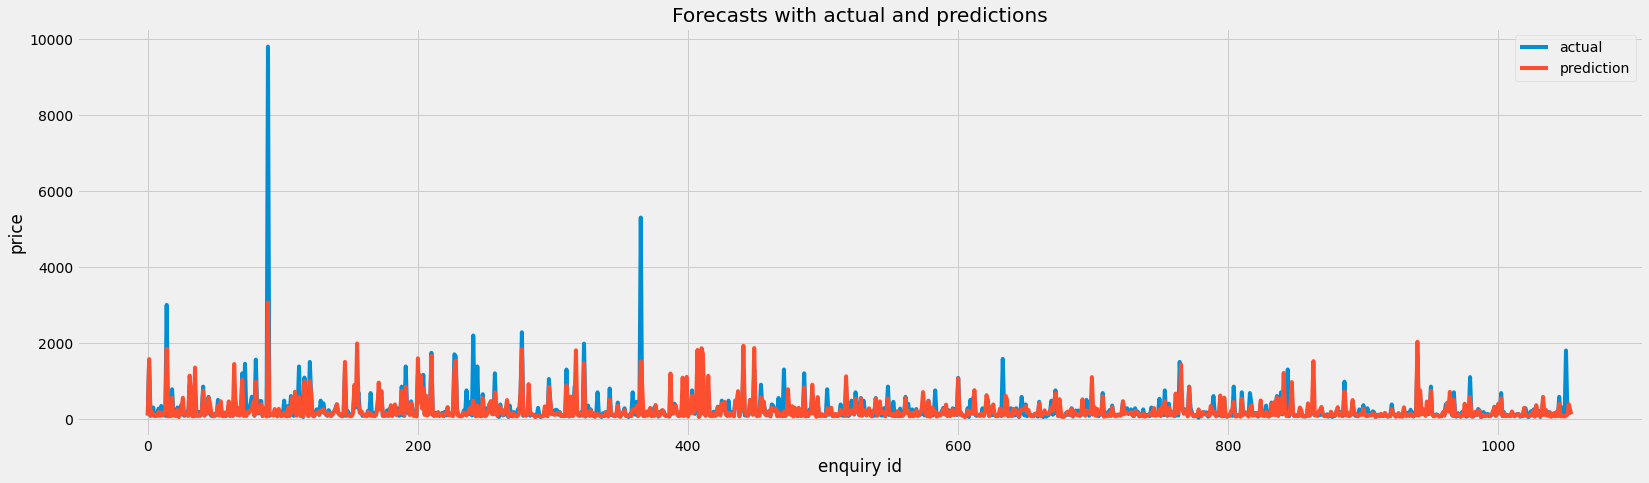

In [32]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,7))
plt.plot(df_pred.index, df_pred['quoted_amount_x'], label='actual')
plt.plot(df_pred.index, df_pred['quoted_amount_y'], label='prediction')
plt.legend(loc='best')
plt.xlabel('enquiry id')
plt.ylabel('price')
plt.title('''Forecasts with actual and predictions''')
plt.show()

In [33]:
thirty = df_pred.head(31)
thirty

,enquiry_id,enquiry_date,quoted_amount_x,quoted_amount_y
0,27763,2018-08-02,110,85
1,27770,2018-08-03,1500,1575
2,27778,2018-08-03,80,90
3,27784,2018-08-03,220,190
4,27791,2018-08-04,300,105
5,27801,2018-08-04,80,75
6,27803,2018-08-05,80,100
7,27838,2018-08-06,90,85
8,27857,2018-08-07,270,185
9,27865,2018-08-08,80,95


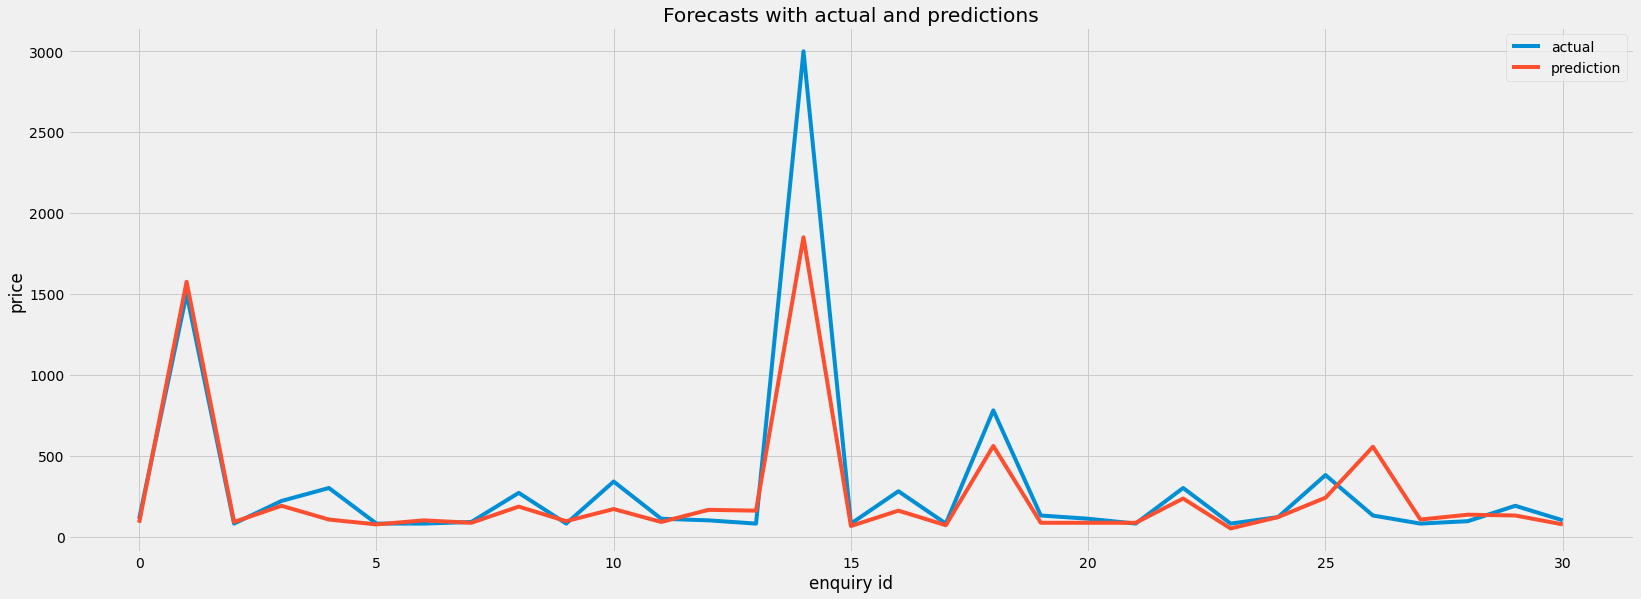

In [34]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,9))
plt.plot(thirty.index, thirty['quoted_amount_x'], label='actual')
plt.plot(thirty.index, thirty['quoted_amount_y'], label='prediction')
plt.legend(loc='best')
plt.xlabel('enquiry id')
plt.ylabel('price')
plt.title('''Forecasts with actual and predictions''')
plt.show()

In [35]:
play = df_pred.loc[2:9]
play

,enquiry_id,enquiry_date,quoted_amount_x,quoted_amount_y
2,27778,2018-08-03,80,90
3,27784,2018-08-03,220,190
4,27791,2018-08-04,300,105
5,27801,2018-08-04,80,75
6,27803,2018-08-05,80,100
7,27838,2018-08-06,90,85
8,27857,2018-08-07,270,185
9,27865,2018-08-08,80,95


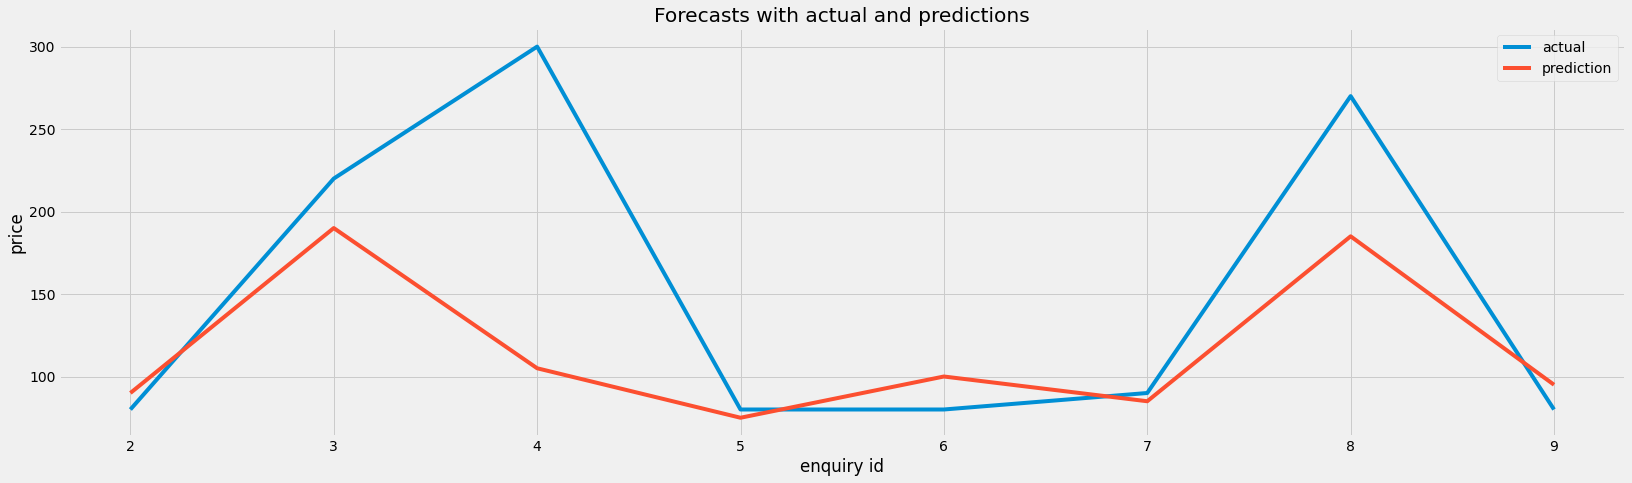

In [36]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,7))
plt.plot(play.index, play['quoted_amount_x'], label='actual')
plt.plot(play.index, play['quoted_amount_y'], label='prediction')
plt.legend(loc='best')
plt.xlabel('enquiry id')
plt.ylabel('price')
plt.title('''Forecasts with actual and predictions''')
plt.show()

In [37]:
import tensorflow as tf
import keras
print(f"TF version: {tf.__version__}, Keras version: {keras.__version__}\n")

TF version: 2.3.0, Keras version: 2.4.3



In [38]:
# create excel writer object
# writer = pd.ExcelWriter('junktoclear_x_y.xls')
# write dataframe to excel
# new.to_excel(writer)
# save the excel
# writer.save()